In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import random

time_start=time.time()

In [2]:
import tensorflow as tf
from tensorflow import keras

# download the data
num_train = 30000
num_test = 10000
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[0:num_train,:,:]
train_labels = train_labels[0:num_train]
print('Training images shape:',train_images.shape)
print('Training labels shape:',train_labels.shape)
print('Testing images shape:',test_images.shape)
print('Training labels shape:',test_labels.shape)

# reshape and scale the images
train_images = train_images.reshape(num_train,28*28)
train_images = train_images.T
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(num_test, 28*28)
test_images = test_images.T
test_images = test_images.astype('float32')/255

print('Reshaped training images shape:', train_images.shape)
print('Reshaped training labels shape:', train_labels.shape)
print('Reshaped testing images shape:', test_images.shape)
print('Reshaped testing labels shape:', test_labels.shape)

# process the labels to one-hot encoded form
from tensorflow.keras.utils import to_categorical
train_labels1 = to_categorical(train_labels)
test_labels1 = to_categorical(test_labels)
train_labels1 = train_labels1.T
test_labels1 = test_labels1.T
print('One-hot encoded training labels shape:', train_labels1.shape)
print('One-hot encoded testing labels shape:', test_labels1.shape)

/Users/yuqinie/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yuqinie/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yuqinie/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yuqinie/o

Training images shape: (30000, 28, 28)
Training labels shape: (30000,)
Testing images shape: (10000, 28, 28)
Training labels shape: (10000,)
Reshaped training images shape: (784, 30000)
Reshaped training labels shape: (30000,)
Reshaped testing images shape: (784, 10000)
Reshaped testing labels shape: (10000,)
One-hot encoded training labels shape: (10, 30000)
One-hot encoded testing labels shape: (10, 10000)


In [3]:
X_train = np.row_stack((train_images, np.ones((1,num_train))))
y_train = train_labels1
X_test = np.row_stack((test_images, np.ones((1,num_test))))
y_test = test_labels1
print ('Train X Shape: ', X_train.shape)
print ('Train Y Shape: ', y_train.shape)
print ('I have m = %d training examples!' % (X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)


Train X Shape:  (785, 30000)
Train Y Shape:  (10, 30000)
I have m = 30000 training examples!

Test X Shape:  (785, 10000)


In [4]:
# add phase to X
X_train = np.multiply(X_train, np.exp(1j*X_train*np.pi))
X_test = np.multiply(X_test, np.exp(1j*X_test*np.pi))

In [5]:
#define the structure of NN
def define_structure(X, Y, hidden_unit):
    input_unit = X.shape[0] # size of input layer
    hidden_unit = hidden_unit #hidden layer of size 
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)
hidden_unit = 100
(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train, hidden_unit)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 785
The size of the hidden layer is:  = 100
The size of the output layer is:  = 10


In [6]:
# initialize parameters
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01 + np.random.randn(hidden_unit, input_unit)*0.01*1j
    W2 = np.random.randn(output_unit, hidden_unit)*0.01 + np.random.randn(output_unit, hidden_unit)*0.01*1j
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [7]:
#forward propagation and backward propagation

def sigmoid(z):
    return 1/(1+np.exp(-z))

def abssigmoid(z):
    return abs(1/(1+np.exp(-z)))

def multinomial(z):
    return np.exp(np.power(abs(z),2))/sum(np.exp(np.power(abs(z),2)))

def relu(x):
    return np.where(x.real<0,0,x.real) + np.where(x.imag<0,0,x.imag)*1j

def zrelu(x):
    return np.where(x.real<0,0,x.real)*np.where(x.imag<0,0,1) + np.where(x.imag<0,0,x.imag)*1j*np.where(x.real<0,0,1)


def forward_propagation(X,Y, parameters):
    m = X.shape[1] # number of training example
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = np.dot(W1, X)
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1)
    A2 = multinomial(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    H=-1/m*np.multiply(Y,np.log(A2))
    L=sum(sum(H[l]) for l in range(len(H)))
    
    return L, A2, cache


def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    Z2 = np.dot(W2,A1)
    dZ2R = np.multiply(A2-Y,2*Z2.real)
    dZ2I = np.multiply(A2-Y,2*Z2.imag)
    dW2R = 1/m * ( np.dot(dZ2R, A1.T.real) + np.dot(dZ2I, A1.T.imag) )
    dW2I = 1/m * ( np.dot(dZ2I, A1.T.real) - np.dot(dZ2R, A1.T.imag) )
    dW2 = dW2R + 1j*dW2I
    dA1R = np.dot(W2.T.real,dZ2R) + np.dot(W2.T.imag,dZ2I)
    dA1I = np.dot(W2.T.real,dZ2I) - np.dot(W2.T.imag,dZ2R)
    Z1 = np.dot(W1,X)
    dZ1R = np.multiply(dA1R, 0.5*(1+np.sign(Z1.real)))
    dZ1I = np.multiply(dA1I, 0.5*(1+np.sign(Z1.imag)))
    dW1R = 1/m * ( np.dot(dZ1R, X.T.real) + np.dot(dZ1I, X.T.imag))
    dW1I = 1/m * ( np.dot(dZ1I, X.T.real) - np.dot(dZ1R, X.T.imag))
    dW1 = dW1R +1j*dW1I
    
    grads = {"dW1": dW1,  "dW2": dW2} 
    
    return grads

# gradient descent algorithm
def gradient_descent(parameters, grads, learning_rate):
    W1 = parameters['W1']
    W2 = parameters['W2']
   
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    
    parameters = {"W1": W1, "W2": W2}
    
    return parameters

In [8]:
# train the NN

def neural_network_model(X, Y, hidden_unit, num_iterations):
    np.random.seed(3)
    input_unit = define_structure(X, Y, hidden_unit)[0]
    output_unit = define_structure(X, Y, hidden_unit)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    save_parameters = []
    
    for i in range(0, num_iterations):
        L, A2, cache = forward_propagation(X, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads, learning_rate = 0.1)
        if (i+1) % 10 == 0:
            print ("Loss after iteration %i: %f" %((i+1), L))
            save_parameters.append(parameters)
            
    return parameters,save_parameters

parameters,save_parameters = neural_network_model(X_train, y_train, hidden_unit, num_iterations=2000)

Loss after iteration 10: 2.302589
Loss after iteration 20: 2.302582
Loss after iteration 30: 2.302575
Loss after iteration 40: 2.302567
Loss after iteration 50: 2.302559
Loss after iteration 60: 2.302550
Loss after iteration 70: 2.302539
Loss after iteration 80: 2.302528
Loss after iteration 90: 2.302515
Loss after iteration 100: 2.302500
Loss after iteration 110: 2.302483
Loss after iteration 120: 2.302463
Loss after iteration 130: 2.302439
Loss after iteration 140: 2.302412
Loss after iteration 150: 2.302379
Loss after iteration 160: 2.302338
Loss after iteration 170: 2.302289
Loss after iteration 180: 2.302228
Loss after iteration 190: 2.302152
Loss after iteration 200: 2.302053
Loss after iteration 210: 2.301925
Loss after iteration 220: 2.301752
Loss after iteration 230: 2.301514
Loss after iteration 240: 2.301171
Loss after iteration 250: 2.300653
Loss after iteration 260: 2.299813
Loss after iteration 270: 2.298317
Loss after iteration 280: 2.295227
Loss after iteration 290: 2.2

In [9]:
# do the pruning

def prediction(parameters, X, Y):
    L, A2, cache = forward_propagation(X,Y, parameters)
    predictions = A2.argmax(axis=0)  
    return predictions

def accuracy(Y, predictions):
    m = Y.shape[1]
    acc=0
    for v in range(m):
        if Y[predictions[v]][v] == 1:
            acc = acc+1
    return acc/m

def pruning(parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    (h,n1)=W1.shape
    (c,h2)=W2.shape
    W11=W1.copy()
    W22=W2.copy()

    n_pr = int(h/2)
    for i in range(n_pr):
        W11[i,:]=np.zeros(n1)
        W22[:,i]=np.zeros(c)

    parameters2 = {"W1": W11, "W2": W22}
    return parameters2

# ramdonly prune half of the nodes
def random_pruning(parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    (h,n1)=W1.shape
    (c,h2)=W2.shape
    W11=W1.copy()
    W22=W2.copy()

    n_pr = int(h/2)
    pr=random.sample(range(0, h), n_pr)

    for i in range(n_pr):
        W11[pr[i],:]=np.zeros(n1)
        W22[:,pr[i]]=np.zeros(c)

    parameters2 = {"W1": W11, "W2": W22}
    return parameters2

#prune all the imaginary part
def imag_pruning(parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    (h,n1)=W1.shape
    (c,h2)=W2.shape
    W11=W1.copy()
    W22=W2.copy()

    W11=W11.real
    W22=W22.real

    parameters2 = {"W1": W11, "W2": W22}
    return parameters2

#prune all the real part
def real_pruning(parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    (h,n1)=W1.shape
    (c,h2)=W2.shape
    W11=W1.copy()
    W22=W2.copy()

    W11=W11.imag
    W22=W22.imag

    parameters2 = {"W1": W11, "W2": W22}
    return parameters2

#prune all the phase
def phase_pruning(parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    (h,n1)=W1.shape
    (c,h2)=W2.shape
    W11=0.1*W1.copy()
    W22=0.1*W2.copy()

    W11=abs(W11)
    W22=abs(W22)

    parameters2 = {"W1": W11, "W2": W22}
    return parameters2

#prune all the amplitude
def amp_pruning(parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    (h,n1)=W1.shape
    (c,h2)=W2.shape
    W11=W1.copy()
    W22=W2.copy()

    W11=0.01*np.exp(1j*np.angle(W11))
    W22=0.01*np.exp(1j*np.angle(W22))

    parameters2 = {"W1": W11, "W2": W22}
    return parameters2

In [11]:
# calculate the accuracy vs iteration

gap=10
n_save=int(len(save_parameters)/gap)
origin_train_accuracy=np.zeros(n_save)
origin_test_accuracy=np.zeros(n_save)
onlyhalf_train_accuracy=np.zeros(n_save)
onlyhalf_test_accuracy=np.zeros(n_save)
onlyamp_train_accuracy=np.zeros(n_save)
onlyamp_test_accuracy=np.zeros(n_save)
onlyphase_train_accuracy=np.zeros(n_save)
onlyphase_test_accuracy=np.zeros(n_save)
onlyreal_train_accuracy=np.zeros(n_save)
onlyreal_test_accuracy=np.zeros(n_save)
onlyimag_train_accuracy=np.zeros(n_save)
onlyimag_test_accuracy=np.zeros(n_save)

for ss in range(n_save):
    
    print('ss=',ss+1,' total=',n_save)
    
    s = int((ss+1)*gap-1)
    
    parameters = save_parameters[s]
    
    predictions = prediction(parameters, X_train, y_train)
    origin_train_accuracy[ss] = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters, X_test, y_test)
    origin_test_accuracy[ss] = float(accuracy(y_test, predictions)*100)
    L, A2, cache = forward_propagation(X_train, y_train, parameters)
    print ("L after iteration %i: %f" %(ss+1, L))
    
    # Monte Carlo simulation
    n_t=10
    train_predictions = np.zeros(n_t)
    test_predictions = np.zeros(n_t)
    for i in range(n_t):
        parameters2=random_pruning(parameters)
        predictions = prediction(parameters2, X_train, y_train)
        train_predictions[i] = float(accuracy(y_train, predictions)*100)
        predictions = prediction(parameters2, X_test, y_test)
        test_predictions[i] = float(accuracy(y_test, predictions)*100)
    onlyhalf_train_accuracy[ss]=sum(train_predictions)/n_t
    onlyhalf_test_accuracy[ss]=sum(test_predictions)/n_t
    
    parameters2=phase_pruning(parameters)
    predictions = prediction(parameters2, X_train, y_train)
    train_predictions = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters2, X_test, y_test)
    test_predictions = float(accuracy(y_test, predictions)*100)
    onlyamp_train_accuracy[ss]=train_predictions
    onlyamp_test_accuracy[ss]=test_predictions

    parameters2=amp_pruning(parameters)
    predictions = prediction(parameters2, X_train, y_train)
    train_predictions = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters2, X_test, y_test)
    test_predictions = float(accuracy(y_test, predictions)*100)
    onlyphase_train_accuracy[ss]=train_predictions
    onlyphase_test_accuracy[ss]=test_predictions
    
    parameters2=real_pruning(parameters)
    predictions = prediction(parameters2, X_train, y_train)
    train_predictions = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters2, X_test, y_test)
    test_predictions= float(accuracy(y_test, predictions)*100)
    onlyimag_train_accuracy[ss]=train_predictions
    onlyimag_test_accuracy[ss]=test_predictions
    
    parameters2=imag_pruning(parameters)
    predictions = prediction(parameters2, X_train, y_train)
    train_predictions = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters2, X_test, y_test)
    test_predictions = float(accuracy(y_test, predictions)*100)
    onlyreal_train_accuracy[ss]=train_predictions
    onlyreal_test_accuracy[ss]=test_predictions

ss= 1  total= 20
L after iteration 1: 2.302498
ss= 2  total= 20
L after iteration 2: 2.302042
ss= 3  total= 20
L after iteration 3: 2.247750
ss= 4  total= 20
L after iteration 4: 0.620617
ss= 5  total= 20
L after iteration 5: 0.283033
ss= 6  total= 20
L after iteration 6: 0.214088
ss= 7  total= 20
L after iteration 7: 0.175300
ss= 8  total= 20
L after iteration 8: 0.129965
ss= 9  total= 20
L after iteration 9: 0.143056
ss= 10  total= 20
L after iteration 10: 0.106808
ss= 11  total= 20
L after iteration 11: 0.078669
ss= 12  total= 20
L after iteration 12: 0.059687
ss= 13  total= 20
L after iteration 13: 0.169094
ss= 14  total= 20
L after iteration 14: 0.100901
ss= 15  total= 20
L after iteration 15: 0.071020
ss= 16  total= 20
L after iteration 16: 0.052199
ss= 17  total= 20
L after iteration 17: 0.191392
ss= 18  total= 20
L after iteration 18: 0.114076
ss= 19  total= 20
L after iteration 19: 0.074014
ss= 20  total= 20
L after iteration 20: 0.052164


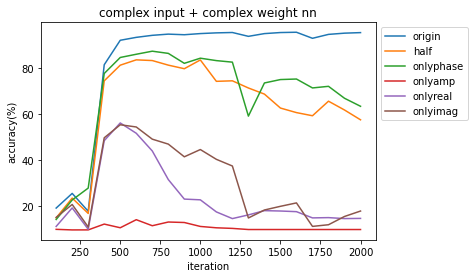

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the curve
plt.figure()
a=[(i+1)*gap*10 for i in range(n_save)]
upperbound = len(a)
a = a[0:upperbound]
plt.plot(a,origin_test_accuracy[0:upperbound])
plt.plot(a,onlyhalf_test_accuracy[0:upperbound])
plt.plot(a,onlyphase_test_accuracy[0:upperbound])
plt.plot(a,onlyamp_test_accuracy[0:upperbound])
plt.plot(a,onlyreal_test_accuracy[0:upperbound])
plt.plot(a,onlyimag_test_accuracy[0:upperbound])
plt.title('complex input + complex weight nn')
plt.legend(['origin','half','onlyphase','onlyamp','onlyreal','onlyimag'],bbox_to_anchor=(1, 1))
plt.xlabel('iteration')
plt.ylabel('accuracy(%)')
plt.show()
plt.savefig('complex+complex.png')

In [ ]:
time_end=time.time()
print('totally cost',time_end-time_start)